In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from scipy.stats import *
import sqlite3

# next command ensures that plots appear inside the notebook
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns  # also improves the look of plots
sns.set()
plt.rcParams['figure.figsize'] = 10, 5  # default hor./vert. size of plots, in inches
plt.rcParams['lines.markeredgewidth'] = 1  # to fix issue with seaborn box plots; needed after import seaborn

In [3]:
df = pd.read_csv(r"C:\Users\Gebruiker\Downloads\export2012.csv")

In [4]:
df

,case,event,startTime,completeTime,AMOUNT_REQ,REG_DATE,org:resource
0,173688,A_SUBMITTED,2011/10/01 00:38:44.546,2011/10/01 00:38:44.546,20000,2011/10/01 00:38:44.546,112
1,173688,A_PARTLYSUBMITTED,2011/10/01 00:38:44.880,2011/10/01 00:38:44.880,20000,2011/10/01 00:38:44.546,112
2,173688,A_PREACCEPTED,2011/10/01 00:39:37.906,2011/10/01 00:39:37.906,20000,2011/10/01 00:38:44.546,112
3,173688,A_PREACCEPTED,2011/10/01 00:39:37.906,2011/10/01 00:39:37.906,20000,2011/10/01 00:38:44.546,112
4,173688,W_Completeren aanvraag,2011/10/01 11:36:46.437,2011/10/01 11:45:13.917,20000,2011/10/01 00:38:44.546,112
...,...,...,...,...,...,...,...
190822,214376,A_SUBMITTED,2012/02/29 23:51:16.799,2012/02/29 23:51:16.799,15000,2012/02/29 23:51:16.799,112
190823,214376,A_PARTLYSUBMITTED,2012/02/29 23:51:17.423,2012/02/29 23:51:17.423,15000,2012/02/29 23:51:16.799,112
190824,214376,A_PARTLYSUBMITTED,2012/02/29 23:51:17.423,2012/02/29 23:51:17.423,15000,2012/02/29 23:51:16.799,112
190825,214376,W_Afhandelen leads,2012/03/01 09:26:46.736,2012/03/01 09:27:41.325,15000,2012/02/29 23:51:16.799,11169


<AxesSubplot:>

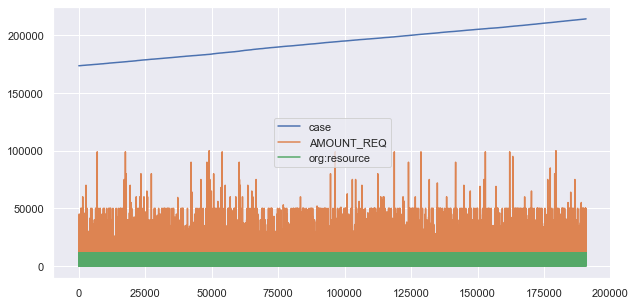

In [5]:
df.plot()

In [6]:
df.stats()

AttributeError: 'DataFrame' object has no attribute 'stats'

In [7]:
df.summary()

AttributeError: 'DataFrame' object has no attribute 'summary'

In [9]:
df.head(20)

,case,event,startTime,completeTime,AMOUNT_REQ,REG_DATE,org:resource
0,173688,A_SUBMITTED,2011/10/01 00:38:44.546,2011/10/01 00:38:44.546,20000,2011/10/01 00:38:44.546,112
1,173688,A_PARTLYSUBMITTED,2011/10/01 00:38:44.880,2011/10/01 00:38:44.880,20000,2011/10/01 00:38:44.546,112
2,173688,A_PREACCEPTED,2011/10/01 00:39:37.906,2011/10/01 00:39:37.906,20000,2011/10/01 00:38:44.546,112
3,173688,A_PREACCEPTED,2011/10/01 00:39:37.906,2011/10/01 00:39:37.906,20000,2011/10/01 00:38:44.546,112
4,173688,W_Completeren aanvraag,2011/10/01 11:36:46.437,2011/10/01 11:45:13.917,20000,2011/10/01 00:38:44.546,112
5,173688,A_ACCEPTED,2011/10/01 11:42:43.308,2011/10/01 11:42:43.308,20000,2011/10/01 00:38:44.546,10862
6,173688,O_SELECTED,2011/10/01 11:45:09.243,2011/10/01 11:45:09.243,20000,2011/10/01 00:38:44.546,10862
7,173688,A_FINALIZED,2011/10/01 11:45:09.243,2011/10/01 11:45:09.243,20000,2011/10/01 00:38:44.546,10862
8,173688,O_CREATED,2011/10/01 11:45:11.197,2011/10/01 11:45:11.197,20000,2011/10/01 00:38:44.546,10862
9,173688,O_SENT,2011/10/01 11:45:11.380,2011/10/01 11:45:11.380,20000,2011/10/01 00:38:44.546,10862


In [10]:
df.describe()

,case,AMOUNT_REQ,org:resource
count,190827.000000,190827.000000,190827.000000
mean,193851.453673,15438.929088,8271.081299
std,11688.517781,12315.133412,4700.713383
min,173688.000000,0.000000,112.000000
25%,183292.000000,6000.000000,10138.000000
50%,194242.000000,10500.000000,10913.000000
75%,203850.000000,20000.000000,11121.000000
max,214376.000000,99999.000000,11339.000000


In [11]:
mask_accepted=(df['event']=="A_ACCEPTED")

In [12]:
mask_accepted


0         False
1         False
2         False
3         False
4         False
          ...  
190822    False
190823    False
190824    False
190825    False
190826    False
Name: event, Length: 190827, dtype: bool

In [13]:
df_accepted=df[mask_accepted]

In [14]:
df_accepted.head()

,case,event,startTime,completeTime,AMOUNT_REQ,REG_DATE,org:resource
5,173688,A_ACCEPTED,2011/10/01 11:42:43.308,2011/10/01 11:42:43.308,20000,2011/10/01 00:38:44.546,10862
27,173691,A_ACCEPTED,2011/10/01 14:33:54.614,2011/10/01 14:33:54.614,5000,2011/10/01 08:08:58.256,10862
59,173694,A_ACCEPTED,2011/10/03 13:34:25.421,2011/10/03 13:34:25.421,7000,2011/10/01 08:10:30.287,11201
142,173715,A_ACCEPTED,2011/10/01 12:24:32.787,2011/10/01 12:24:32.787,45000,2011/10/01 09:59:10.501,10912
160,173718,A_ACCEPTED,2011/10/01 10:42:21.977,2011/10/01 10:42:21.977,15000,2011/10/01 10:37:39.362,10862


In [15]:
df_accepted.count()


case            5113
event           5113
startTime       5113
completeTime    5113
AMOUNT_REQ      5113
REG_DATE        5113
org:resource    5113
dtype: int64

In [16]:
df_accepted


,case,event,startTime,completeTime,AMOUNT_REQ,REG_DATE,org:resource
5,173688,A_ACCEPTED,2011/10/01 11:42:43.308,2011/10/01 11:42:43.308,20000,2011/10/01 00:38:44.546,10862
27,173691,A_ACCEPTED,2011/10/01 14:33:54.614,2011/10/01 14:33:54.614,5000,2011/10/01 08:08:58.256,10862
59,173694,A_ACCEPTED,2011/10/03 13:34:25.421,2011/10/03 13:34:25.421,7000,2011/10/01 08:10:30.287,11201
142,173715,A_ACCEPTED,2011/10/01 12:24:32.787,2011/10/01 12:24:32.787,45000,2011/10/01 09:59:10.501,10912
160,173718,A_ACCEPTED,2011/10/01 10:42:21.977,2011/10/01 10:42:21.977,15000,2011/10/01 10:37:39.362,10862
...,...,...,...,...,...,...,...
190734,214355,A_ACCEPTED,2012/03/02 20:24:21.560,2012/03/02 20:24:21.560,5000,2012/02/29 22:42:41.754,11201
190749,214358,A_ACCEPTED,2012/03/01 17:01:02.397,2012/03/01 17:01:02.397,3500,2012/02/29 22:43:26.064,11299
190762,214361,A_ACCEPTED,2012/03/01 18:24:29.805,2012/03/01 18:24:29.805,5000,2012/02/29 23:11:37.974,10982
190783,214364,A_ACCEPTED,2012/03/02 10:01:55.962,2012/03/02 10:01:55.962,5000,2012/02/29 23:22:24.570,11003


AttributeError: 'Rectangle' object has no property 'normed'

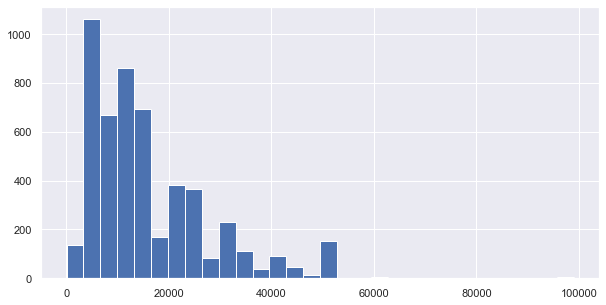

In [24]:
df_accepted['AMOUNT_REQ'].plot(kind='hist', bins=30, normed=True);


AttributeError: 'Rectangle' object has no property 'normed'

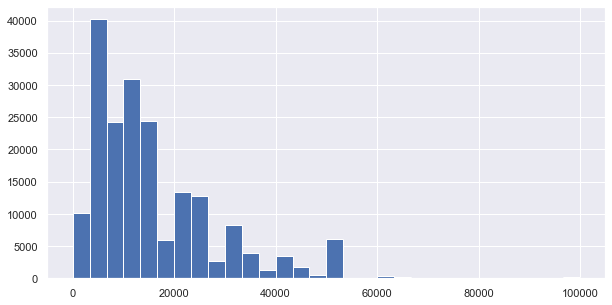

In [25]:
df['AMOUNT_REQ'].plot(kind='hist', bins=30, normed=True);

In [26]:
df

,case,event,startTime,completeTime,AMOUNT_REQ,REG_DATE,org:resource
0,173688,A_SUBMITTED,2011/10/01 00:38:44.546,2011/10/01 00:38:44.546,20000,2011/10/01 00:38:44.546,112
1,173688,A_PARTLYSUBMITTED,2011/10/01 00:38:44.880,2011/10/01 00:38:44.880,20000,2011/10/01 00:38:44.546,112
2,173688,A_PREACCEPTED,2011/10/01 00:39:37.906,2011/10/01 00:39:37.906,20000,2011/10/01 00:38:44.546,112
3,173688,A_PREACCEPTED,2011/10/01 00:39:37.906,2011/10/01 00:39:37.906,20000,2011/10/01 00:38:44.546,112
4,173688,W_Completeren aanvraag,2011/10/01 11:36:46.437,2011/10/01 11:45:13.917,20000,2011/10/01 00:38:44.546,112
...,...,...,...,...,...,...,...
190822,214376,A_SUBMITTED,2012/02/29 23:51:16.799,2012/02/29 23:51:16.799,15000,2012/02/29 23:51:16.799,112
190823,214376,A_PARTLYSUBMITTED,2012/02/29 23:51:17.423,2012/02/29 23:51:17.423,15000,2012/02/29 23:51:16.799,112
190824,214376,A_PARTLYSUBMITTED,2012/02/29 23:51:17.423,2012/02/29 23:51:17.423,15000,2012/02/29 23:51:16.799,112
190825,214376,W_Afhandelen leads,2012/03/01 09:26:46.736,2012/03/01 09:27:41.325,15000,2012/02/29 23:51:16.799,11169


In [27]:
df.head(20)

,case,event,startTime,completeTime,AMOUNT_REQ,REG_DATE,org:resource
0,173688,A_SUBMITTED,2011/10/01 00:38:44.546,2011/10/01 00:38:44.546,20000,2011/10/01 00:38:44.546,112
1,173688,A_PARTLYSUBMITTED,2011/10/01 00:38:44.880,2011/10/01 00:38:44.880,20000,2011/10/01 00:38:44.546,112
2,173688,A_PREACCEPTED,2011/10/01 00:39:37.906,2011/10/01 00:39:37.906,20000,2011/10/01 00:38:44.546,112
3,173688,A_PREACCEPTED,2011/10/01 00:39:37.906,2011/10/01 00:39:37.906,20000,2011/10/01 00:38:44.546,112
4,173688,W_Completeren aanvraag,2011/10/01 11:36:46.437,2011/10/01 11:45:13.917,20000,2011/10/01 00:38:44.546,112
5,173688,A_ACCEPTED,2011/10/01 11:42:43.308,2011/10/01 11:42:43.308,20000,2011/10/01 00:38:44.546,10862
6,173688,O_SELECTED,2011/10/01 11:45:09.243,2011/10/01 11:45:09.243,20000,2011/10/01 00:38:44.546,10862
7,173688,A_FINALIZED,2011/10/01 11:45:09.243,2011/10/01 11:45:09.243,20000,2011/10/01 00:38:44.546,10862
8,173688,O_CREATED,2011/10/01 11:45:11.197,2011/10/01 11:45:11.197,20000,2011/10/01 00:38:44.546,10862
9,173688,O_SENT,2011/10/01 11:45:11.380,2011/10/01 11:45:11.380,20000,2011/10/01 00:38:44.546,10862


In [28]:
df.head(30)

,case,event,startTime,completeTime,AMOUNT_REQ,REG_DATE,org:resource
0,173688,A_SUBMITTED,2011/10/01 00:38:44.546,2011/10/01 00:38:44.546,20000,2011/10/01 00:38:44.546,112
1,173688,A_PARTLYSUBMITTED,2011/10/01 00:38:44.880,2011/10/01 00:38:44.880,20000,2011/10/01 00:38:44.546,112
2,173688,A_PREACCEPTED,2011/10/01 00:39:37.906,2011/10/01 00:39:37.906,20000,2011/10/01 00:38:44.546,112
3,173688,A_PREACCEPTED,2011/10/01 00:39:37.906,2011/10/01 00:39:37.906,20000,2011/10/01 00:38:44.546,112
4,173688,W_Completeren aanvraag,2011/10/01 11:36:46.437,2011/10/01 11:45:13.917,20000,2011/10/01 00:38:44.546,112
5,173688,A_ACCEPTED,2011/10/01 11:42:43.308,2011/10/01 11:42:43.308,20000,2011/10/01 00:38:44.546,10862
6,173688,O_SELECTED,2011/10/01 11:45:09.243,2011/10/01 11:45:09.243,20000,2011/10/01 00:38:44.546,10862
7,173688,A_FINALIZED,2011/10/01 11:45:09.243,2011/10/01 11:45:09.243,20000,2011/10/01 00:38:44.546,10862
8,173688,O_CREATED,2011/10/01 11:45:11.197,2011/10/01 11:45:11.197,20000,2011/10/01 00:38:44.546,10862
9,173688,O_SENT,2011/10/01 11:45:11.380,2011/10/01 11:45:11.380,20000,2011/10/01 00:38:44.546,10862


In [29]:
df.head(20,40)

TypeError: head() takes from 1 to 2 positional arguments but 3 were given